In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from tensorflow import keras
print(f'Tensorflow {tf.__version__}')

Tensorflow 2.9.0


# 데이터 전처리

1. 적재 (load)
1. 전처리 (preprocessing)

In [4]:
from tensorflow.keras.utils import image_dataset_from_directory

# train_dataset = image_dataset_from_directory('./data/cats_and_dogs_filtered/train/')
train_dataset = image_dataset_from_directory(
    'data/cats_and_dogs_filtered/train/', 
    image_size=(180, 180), batch_size=32)

validation_dataset = image_dataset_from_directory(
    'data/cats_and_dogs_filtered/validation/',
    image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [5]:
for sample_batch, label_batch in train_dataset:
    print(f'X.shape={sample_batch.shape}, y.shape={label_batch.shape}')
    break

X.shape=(32, 180, 180, 3), y.shape=(32,)


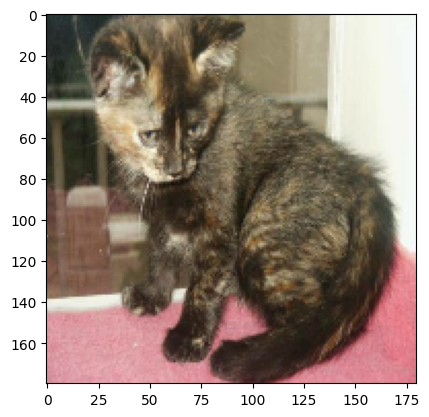

In [6]:
sample_image = sample_batch[3].numpy().astype('uint8')
plt.imshow(sample_image)

## 모델 제작 (신경망 설계)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

def create_model(name):
    model = keras.Sequential([
        keras.Input(shape=(180, 180, 3)), 
        layers.Rescaling(1./255), # 단위 정규화 [0, 1]
        layers.Conv2D(32, kernel_size=3, activation='relu'), 
        layers.MaxPool2D(pool_size=2), 
        layers.Conv2D(64, kernel_size=3, activation='relu'), 
        layers.MaxPool2D(pool_size=2), 
        layers.Conv2D(128, kernel_size=3, activation='relu'), 
        layers.MaxPool2D(pool_size=2), 
        layers.Conv2D(256, kernel_size=3, activation='relu'), 
        layers.MaxPool2D(pool_size=2), 
        layers.Conv2D(256, kernel_size=3, activation='relu'), 
        # layers.MaxPool2D(pool_size=2), 
        # 출력
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid', name='output')
    ], name=name)
    return model

In [9]:
model = create_model(name='cats_and_dogs')
model.summary()

Model: "cats_and_dogs"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)     

In [10]:
from tensorflow.keras import losses, optimizers, metrics
from tensorflow.keras import metrics

model.compile(loss=losses.binary_crossentropy, optimizer=optimizers.RMSprop(),
              # metrics=[keras.metrics.Accuaracy()])
              # metrics=[tf.keras.metrics.Accuracy()])
              # metrics=['acc'])
              metrics=[tf.keras.metrics.Accuracy()])


In [11]:
from tensorflow.keras import callbacks

callbacks = [
    callbacks.ModelCheckpoint('./checkpoints/cats_and_dogs.kears',
                              save_best_only=True, 
                              monitor='val_loss'), 
    callbacks.EarlyStopping(monitor='val_loss', patience=3)
]
callbacks

In [12]:
from tensorflow.keras import callbacks as cb

callbacks = lambda checkpopint_path: [
    cb.ModelCheckpoint(checkpopint_path,
                              save_best_only=True, 
                              monitor='val_loss'), 
    #cb.EarlyStopping(monitor='val_loss', patience=3)
]

In [13]:
callbacks('./checkpoints/cats_and_dogs.kears')

In [14]:
from tensorflow.keras import losses, optimizers

with tf.device('CPU'):
    model = create_model(name='cats_and_dogs')
    model.compile(loss=losses.binary_crossentropy, optimizer=optimizers.RMSprop(),
                           metrics=['acc'])
    history = model.fit(train_dataset, epochs=1, validation_data=validation_dataset, 
                    callbacks=callbacks('./checkpoints/cats_and_dogs.keras'))

63/63 [==============================] - 37s 575ms/step - loss: 0.7808 - acc: 0.5105 - val_loss: 0.6896 - val_acc: 0.5030


In [15]:
from tensorflow.keras import losses, optimizers

model = create_model(name='cats_and_dogs')
model.compile(loss=losses.binary_crossentropy, optimizer=optimizers.RMSprop(),
                           metrics=['acc'])
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, 
                    callbacks=callbacks('./checkpoints/cats_and_dogs.keras'))

Epoch 1/30
63/63 [==============================] - 7s 54ms/step - loss: 0.7287 - acc: 0.4965 - val_loss: 0.6922 - val_acc: 0.5100
Epoch 2/30
63/63 [==============================] - 3s 45ms/step - loss: 0.7052 - acc: 0.5280 - val_loss: 6.8453 - val_acc: 0.5000
Epoch 3/30
63/63 [==============================] - 3s 45ms/step - loss: 0.7914 - acc: 0.5925 - val_loss: 0.7697 - val_acc: 0.5530
Epoch 4/30
63/63 [==============================] - 3s 45ms/step - loss: 0.6386 - acc: 0.6445 - val_loss: 0.7063 - val_acc: 0.5650
Epoch 5/30
63/63 [==============================] - 3s 45ms/step - loss: 0.5951 - acc: 0.6880 - val_loss: 0.6354 - val_acc: 0.6390
Epoch 6/30
63/63 [==============================] - 3s 45ms/step - loss: 0.5670 - acc: 0.7105 - val_loss: 0.8235 - val_acc: 0.6500
Epoch 7/30
63/63 [==============================] - 3s 46ms/step - loss: 0.5426 - acc: 0.7335 - val_loss: 0.5801 - val_acc: 0.7030
Epoch 8/30
63/63 [==============================] - 3s 45ms/step - loss: 0.4988 - a

In [16]:
train_results = pd.DataFrame(history.history)
train_results[-5:]

,loss,acc,val_loss,val_acc
25,0.046076,0.9865,2.088275,0.703
26,0.060881,0.9820,1.862790,0.737
27,0.043045,0.9915,2.874276,0.672
28,0.058201,0.9850,1.966210,0.746
29,0.033360,0.9885,2.103124,0.729


<Axes: >

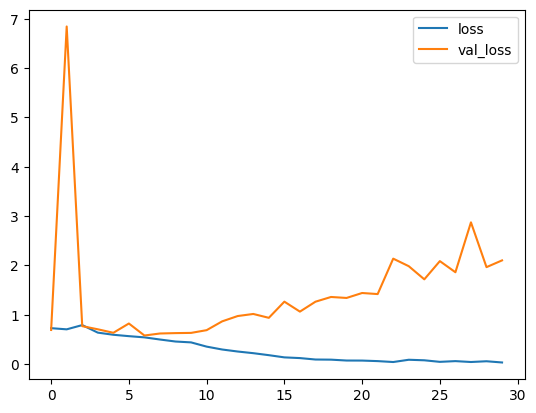

In [17]:
train_results[['loss', 'val_loss']].plot()

문제: 과적합

원인?

1. 모델 가설공간 (설계로써 결정된다)
1. 부족한 데이터

### 데이터 증식

In [18]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1), 
    layers.RandomZoom(0.2)
])

In [19]:
plt.figure(figsize=(10, 10))

for images, _ in train_dataset.take(1):
    print(images.shape)

(32, 180, 180, 3)


<Figure size 1000x1000 with 0 Axes>

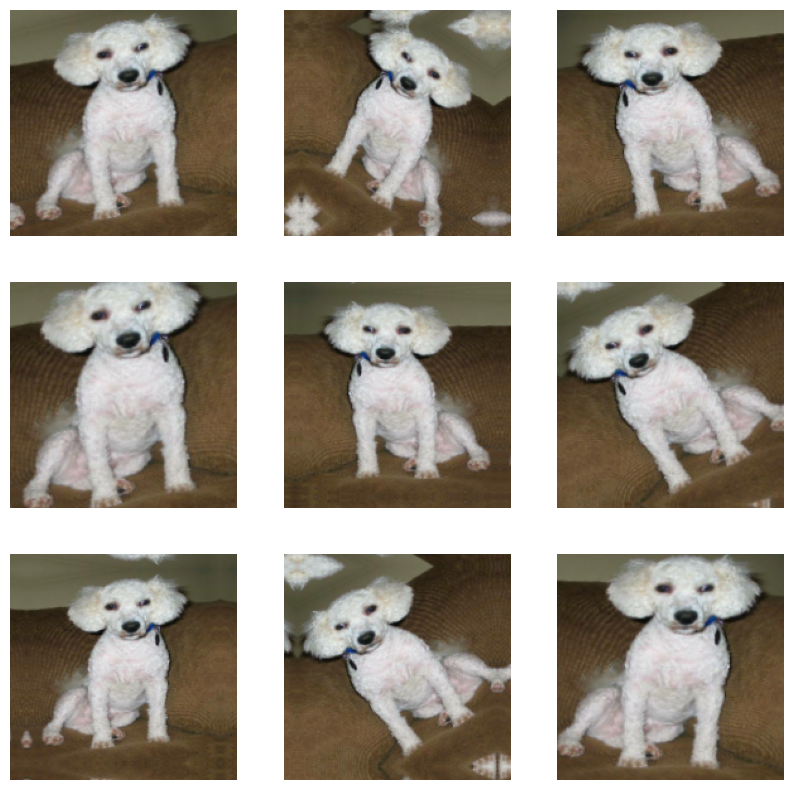

In [20]:
plt.figure(figsize=(10, 10))

for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

def create_model(name):
    model = keras.Sequential([
        keras.Input(shape=(180, 180, 3)), 
        data_augmentation, 
        layers.Rescaling(1./255), # 단위 정규화 [0, 1]
        layers.Conv2D(32, kernel_size=3, activation='relu'), 
        layers.MaxPool2D(pool_size=2), 
        layers.Conv2D(64, kernel_size=3, activation='relu'), 
        layers.MaxPool2D(pool_size=2), 
        layers.Conv2D(128, kernel_size=3, activation='relu'), 
        layers.MaxPool2D(pool_size=2), 
        layers.Conv2D(256, kernel_size=3, activation='relu'), 
        layers.MaxPool2D(pool_size=2), 
        layers.Conv2D(256, kernel_size=3, activation='relu'), 
        # layers.MaxPool2D(pool_size=2), 
        # 출력
        layers.Flatten(),
        layers.Dropout(0.5), # 과적합 개선용
        layers.Dense(1, activation='sigmoid', name='output')
    ], name=name)
    return model

In [22]:
from tensorflow.keras import losses, optimizers

model = create_model(name='cats_and_dogs')
model.compile(loss=losses.binary_crossentropy, optimizer=optimizers.RMSprop(),
                           metrics=['acc'])
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, 
                    callbacks=callbacks('./checkpoints/cats_and_dogs_augmented.keras'))

Epoch 1/30
63/63 [==============================] - 6s 76ms/step - loss: 0.7004 - acc: 0.5150 - val_loss: 0.6911 - val_acc: 0.5000
Epoch 2/30
63/63 [==============================] - 5s 71ms/step - loss: 0.6997 - acc: 0.5395 - val_loss: 0.6839 - val_acc: 0.5600
Epoch 3/30
63/63 [==============================] - 5s 71ms/step - loss: 0.6794 - acc: 0.5705 - val_loss: 0.6469 - val_acc: 0.6650
Epoch 4/30
63/63 [==============================] - 4s 70ms/step - loss: 0.6771 - acc: 0.5930 - val_loss: 0.6946 - val_acc: 0.5610
Epoch 5/30
63/63 [==============================] - 5s 70ms/step - loss: 0.6467 - acc: 0.6385 - val_loss: 0.7070 - val_acc: 0.5820
Epoch 6/30
63/63 [==============================] - 4s 70ms/step - loss: 0.6465 - acc: 0.6460 - val_loss: 0.6307 - val_acc: 0.6280
Epoch 7/30
63/63 [==============================] - 5s 71ms/step - loss: 0.6101 - acc: 0.6610 - val_loss: 0.6215 - val_acc: 0.6190
Epoch 8/30
63/63 [==============================] - 5s 71ms/step - loss: 0.6100 - a

In [23]:
train_results = pd.DataFrame(history.history)
train_results[-5:]

,loss,acc,val_loss,val_acc
25,0.401921,0.8140,0.596910,0.742
26,0.410156,0.8115,0.466612,0.797
27,0.383680,0.8300,0.479191,0.791
28,0.396702,0.8200,1.248707,0.625
29,0.386452,0.8260,0.514543,0.754


In [24]:
train_results['val_acc'].max()

0.796999990940094

<Axes: >

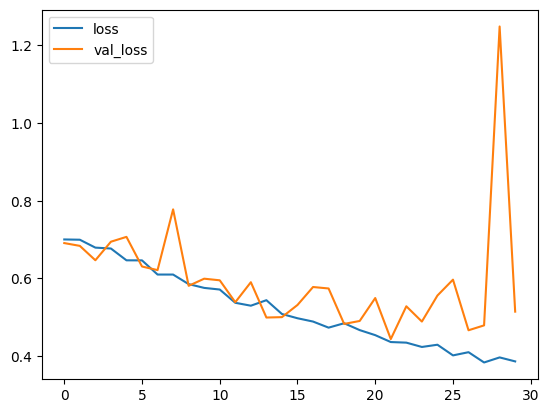

In [25]:
train_results[['loss', 'val_loss']].plot()

## 전이 학습

대규모 데이터에 대해 사전 훈련된 모형을 기반 모델로 사용하여 응용 모형 성능 개선

In [26]:
conv_base = keras.applications.vgg16.VGG16(weights='imagenet')

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [27]:
from tensorflow.keras.utils import load_img, img_to_array

vgg16 = keras.applications.vgg16.VGG16(weights='imagenet')

mozzi = load_img('mozzi.jpg', target_size=(224, 224))
x1 = img_to_array(mozzi)
x1 = keras.applications.vgg16.preprocess_input(x1)
type(x1), x1.shape

(numpy.ndarray, (224, 224, 3))

In [28]:
X_new = np.array([x1])
Y_pred = vgg16.predict(X_new)
np.argmax(Y_pred, axis=1)

1/1 [==============================] - 1s 1s/step


array([153], dtype=int64)

In [29]:
# CPU로 실행하는 방법
with tf.device('CPU'):
    mozzi = load_img('mozzi.jpg', target_size=(224, 224))
    x1 = img_to_array(mozzi)
    x1 = keras.applications.vgg16.preprocess_input(x1)
    type(x1), x1.shape
    X_new = np.array([x1])
    Y_pred = vgg16.predict(X_new)
    print(np.argmax(Y_pred, axis=1))

1/1 [==============================] - 1s 1s/step
[153]


In [30]:
# GPU로 실습
mozzi = load_img('mozzi.jpg', target_size=(224, 224))
x1 = img_to_array(mozzi)
x1 = keras.applications.vgg16.preprocess_input(x1)

X_new = np.array([x1])
Y_pred = vgg16.predict(X_new)
np.argmax(Y_pred, axis=1)

1/1 [==============================] - 0s 16ms/step


array([153], dtype=int64)

In [31]:
Y_pred.shape

(1, 1000)

In [32]:
np.max(Y_pred, axis=1)

array([0.9218279], dtype=float32)

In [33]:
np.argsort(Y_pred, axis=1)[0, -3:]

array([187, 203, 153], dtype=int64)

In [34]:
Y_pred[0, [153, 203, 187]]

array([0.9218279 , 0.02530325, 0.01706875], dtype=float32)

In [35]:
conv_base = keras.applications.vgg16.VGG16(weights='imagenet', 
                                          include_top=False)
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [36]:
conv_base = keras.applications.vgg16.VGG16(weights='imagenet',
                                           input_shape=(180, 180, 3),
                                          include_top=False)
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [37]:
model = keras.Sequential([
    conv_base, 
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 1)                 12801     
                                                                 
Total params: 14,727,489
Trainable params: 14,727,489
Non-trainable params: 0
_________________________________________________________________


In [38]:
conv_base.trainable = False

def create_model(base_model):
    model = keras.Sequential([
        base_model, 
        # 응용에 맞게 출력층 설정(훈련 필요)
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

create_model(conv_base).summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 12800)             0         
                                                                 
 dense_1 (Dense)             (None, 256)               3277056   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 17,992,001
Trainable params: 3,277,313
Non-trainable params: 14,714,688
_________________________________________________________________


In [40]:
from tensorflow.keras import losses, optimizers

# base model
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet', include_top=False, input_shape=(180, 180, 3))
conv_base.trainable = False
# 응용 모델
model = create_model(conv_base)
# 응용 모델 훈련
model.compile(loss=losses.binary_crossentropy, 
              optimizer=optimizers.RMSprop(), metrics=['acc'])
history = model.fit(train_dataset, epochs=20,
                    validation_data=validation_dataset, 
                    callbacks=callbacks('./checkpoints/cats_and_dogs_vgg16_base.keras'))

Epoch 1/20
63/63 [==============================] - 19s 264ms/step - loss: 8.2364 - acc: 0.8865 - val_loss: 0.9137 - val_acc: 0.9370
Epoch 2/20
63/63 [==============================] - 16s 248ms/step - loss: 0.5683 - acc: 0.9605 - val_loss: 1.4191 - val_acc: 0.9010
Epoch 3/20
63/63 [==============================] - 12s 188ms/step - loss: 0.3731 - acc: 0.9655 - val_loss: 0.4774 - val_acc: 0.9630
Epoch 4/20
63/63 [==============================] - 12s 196ms/step - loss: 0.1778 - acc: 0.9795 - val_loss: 0.9113 - val_acc: 0.9600
Epoch 5/20
63/63 [==============================] - 12s 193ms/step - loss: 0.2771 - acc: 0.9800 - val_loss: 1.0697 - val_acc: 0.9570
Epoch 6/20
63/63 [==============================] - 14s 215ms/step - loss: 0.1908 - acc: 0.9855 - val_loss: 0.9066 - val_acc: 0.9620
Epoch 7/20
63/63 [==============================] - 13s 205ms/step - loss: 0.2677 - acc: 0.9845 - val_loss: 1.0051 - val_acc: 0.9650
Epoch 8/20
63/63 [==============================] - 12s 187ms/step - 

In [ ]:
from tensorflow.keras import losses, optimizers

with tf.device('CPU'):
    conv_base.trainable = False
    model = create_model(conv_base)

    model.compile(loss=losses.binary_crossentropy,
                  optimizer=optimizers.RMSprop(),
                  metrics=['acc'])
    history = model.fit(train_dataset, epochs=1,
                        validation_data=validation_dataset, 
                        callbacks=callbacks('./checkpoints/cats_and_dogs_vgg16_base.keras'))

### 특성 추출 후 응용 모델 구성

1. 기반 모델로 특성 추출
1. 응용 모델의 입력으로 전달

In [ ]:
for images, labels in train_dataset.take(1):
    # 전처리
    proprocessed_images = keras.applications.vgg16.preprocess_input(images)
    # 기반 모델로 입력을 처리
    features = conv_base(proprocessed_images)
    
features.shape

In [ ]:
to_image = lambda tensor: tensor.numpy().astype('uint8')

plt.imshow(to_image(images[0]))

In [ ]:
fig, subplots = plt.subplots(16, 32, figsize=(10, 4))

for i in range(features.shape[-1]):
    ax = subplots.ravel()[i]
    ax.imshow(features[0, :, :, i])
    ax.axis('off')

In [ ]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        all_labels.append(labels)
        # 전처리
        proprocessed_images = keras.applications.vgg16.preprocess_input(images)
        # 기반 모델로 입력을 처리
        features = conv_base(proprocessed_images)
        all_features.append(features)
    return np.concatenate(all_features), np.concatenate(all_labels)

In [ ]:
train_features, train_lables = get_features_and_labels(train_dataset)
val_features, val_lables = get_features_and_labels(validation_dataset)

In [ ]:
train_features.shape, train_lables.shape

In [ ]:
val_features.shape, val_lables.shape

## 연습

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array

vgg16 = keras.applications.vgg16.VGG16(weights='imagenet')

# GPU로 실습
mozzi = load_img('mozzi.jpg', target_size=(224, 224))
x1 = img_to_array(mozzi)
x1 = keras.applications.vgg16.preprocess_input(x1)

X_new = np.array([x1])
Y_pred = vgg16.predict(X_new)
np.argmax(Y_pred, axis=1)

In [ ]:
tf.keras.applications.vgg16.decode_predictions(vgg16.predict(X_new), top=5)

In [ ]:
### 그림 알아 보기

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array

vgg16 = keras.applications.vgg16.VGG16(weights='imagenet')

# 원 이미지, 하부에 바로 복사
org_img = load_img('whale-1.jpg', target_size=(224, 224))
# 전처리 이미지
prep_img = keras.applications.vgg16.preprocess_input(img_to_array(org_img))
# VGG16 입력 이미지
input_img = np.array([prep_img])

# VGG16으로 예측 
tf.keras.applications.vgg16.decode_predictions(vgg16.predict(input_img), top=5)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array

vgg16 = keras.applications.vgg16.VGG16(weights='imagenet')

# 원 이미지, 하부에 바로 복사
org_img = load_img('whale-1.jpg', target_size=(224, 224))
# 전처리 이미지
prep_img = keras.applications.vgg16.preprocess_input(img_to_array(org_img))
# VGG16 입력 이미지
input_img = np.array([prep_img])

# VGG16으로 예측 
tf.keras.applications.vgg16.decode_predictions(vgg16.predict(input_img), top=5)